In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\LENOVO\Documents\Data_Science\Naresh_it\Data Science\Batch october\datasets\omkar_sir_datasets\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$Box$-$Plot$

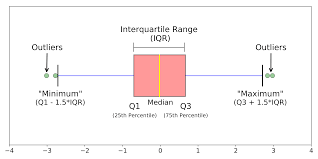

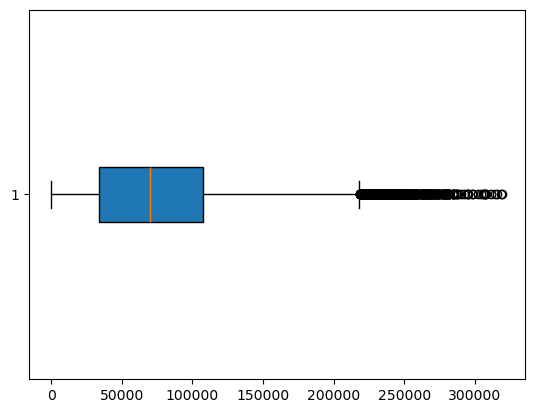

In [3]:
plt.boxplot(visa_df['prevailing_wage'],vert=False,orientation="vertcal",patch_artist=True)
plt.show()

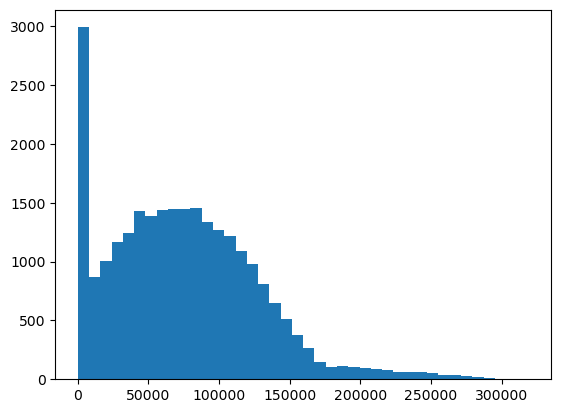

In [46]:
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.show()

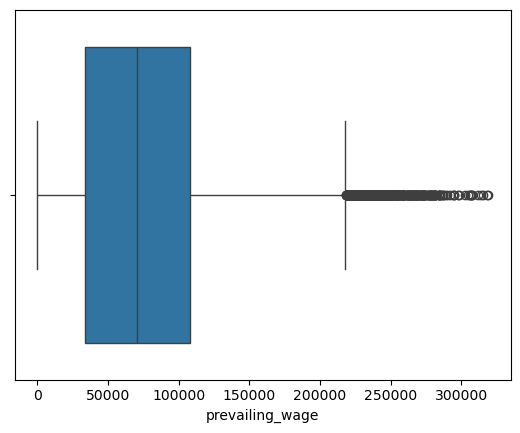

In [47]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')
plt.show()

$Dealing$-$Outliers$

- Removal of Outliers
- Impute the outliers with median value
  - because median is not impacted by outliers
- Cap the outliers with q1,which are having more than q1
- Cap the outliers with q3,which are having less than q3  

__Find the outliers__
- step1: find q1,q2,q3
- step2: calculate iqr = q3-q1
- step3: upper bound(ub) = q3 + 1.5*iqr
- step4: lower bound(lb) = q3 - 1.5*iqr
- step5: condition1 = column < lb
- step6: condition2 = column > ub
- step7: (condition1) | (condition2)
- step8: column[(condition1) | (condition2)]

In [48]:
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)
iqr=q3-q1
print(q1,q2,q3,iqr)

34015.479999999996 70308.20999999999 107735.51250000001 73720.03250000002


In [52]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
cond1 = visa_df['prevailing_wage'] < lower_bound
cond2 = visa_df['prevailing_wage'] > upper_bound
outliers = visa_df['prevailing_wage'][cond1|cond2]
outliers
type(outliers)
# now convert this series into array of values using .values
outliers_data=outliers.values
outliers_data
len(outliers_data)

427

In [46]:
def outliers():
    q1=np.percentile(visa_df['prevailing_wage'],25)
    q2=np.percentile(visa_df['prevailing_wage'],50)
    q3=np.percentile(visa_df['prevailing_wage'],75)
    iqr=q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    cond1 = visa_df['prevailing_wage'] < lower_bound
    cond2 = visa_df['prevailing_wage'] > upper_bound
    outliers = visa_df['prevailing_wage'][cond1|cond2]
    outliers
    #now convert this series into array of values using .values
    outliers_data=outliers.values
    return outliers_data

outliers_data = outliers()
len(outliers_data)


427

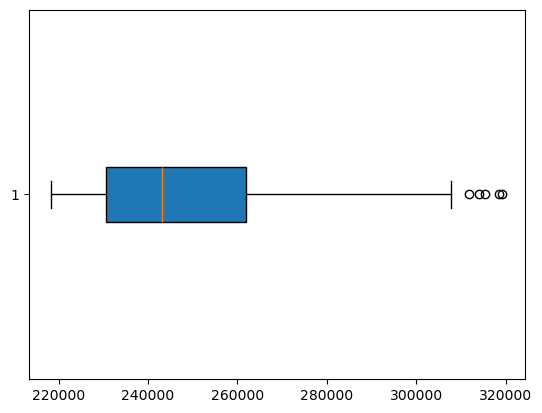

In [53]:
plt.boxplot(outliers_data,vert=False,patch_artist=True)
plt.show()

In [54]:
outliers_percentage = len(outliers_data)/len(visa_df['prevailing_wage'])*100
outliers_percentage

1.6758241758241759

$Case-1$:

__Removal of outliers__

- we have 427 outliers in prevailing_wage column
- that mean we have to remove all 427 rows from entire dataframe

In [56]:
#non outliers data of prevailing_wage column
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)
iqr=q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
cond1 = visa_df['prevailing_wage'] > lower_bound
cond2 = visa_df['prevailing_wage'] < upper_bound
non_outliers = visa_df[cond1&cond2]
non_outliers
len(non_outliers.values)

25053

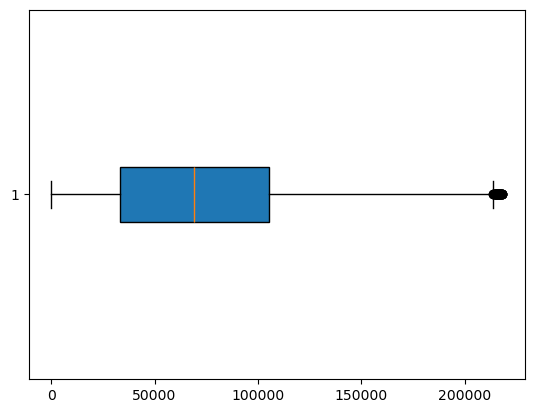

In [57]:
plt.boxplot(non_outliers['prevailing_wage'],vert=False,patch_artist=True)
plt.show()

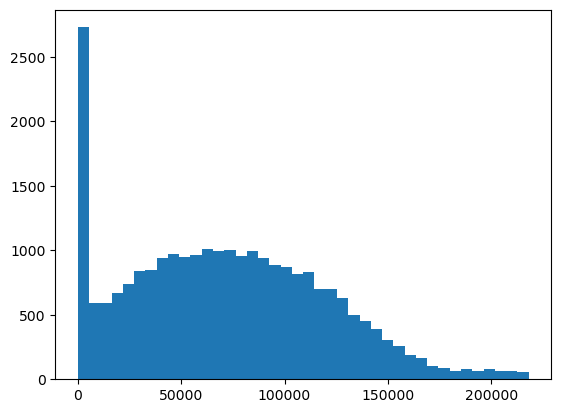

In [58]:
plt.hist(non_outliers['prevailing_wage'],bins=40)
plt.show()

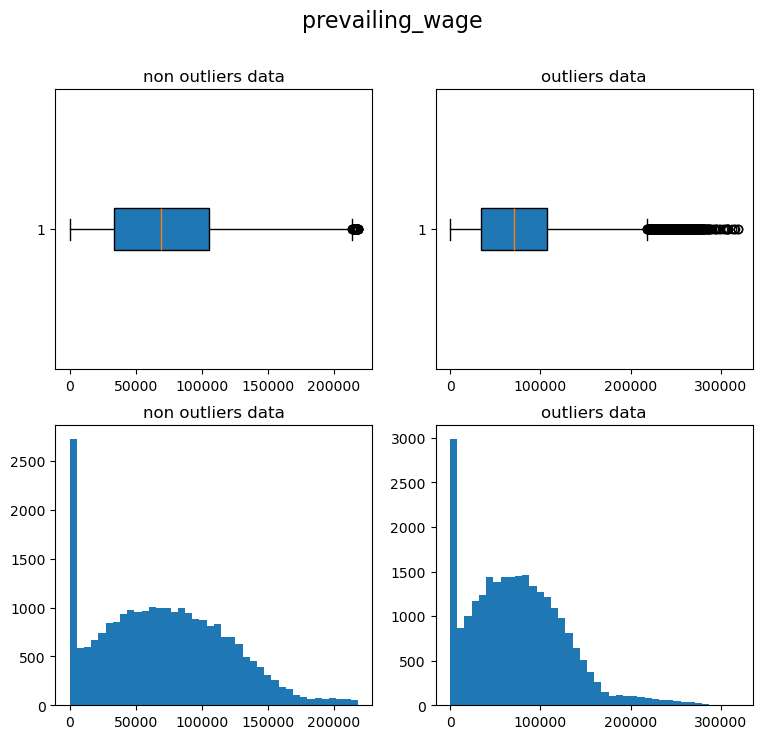

In [59]:
plt.figure(figsize=(9,8))
plt.subplot(2,2,1)
plt.title('non outliers data')
plt.boxplot(non_outliers['prevailing_wage'],vert=False,patch_artist=True)

plt.subplot(2,2,2)
plt.title('outliers data')
plt.boxplot(visa_df['prevailing_wage'],vert=False,patch_artist=True)

plt.subplot(2,2,3)
plt.title('non outliers data')
plt.hist(non_outliers['prevailing_wage'],bins=40)

plt.subplot(2,2,4)
plt.title('outliers data')
plt.hist(visa_df['prevailing_wage'],bins=40)

# 🔽 Common subtitle
plt.suptitle("prevailing_wage", fontsize=16)
plt.show()

$Case-2$:

__Impute with Median__

- We got 427 outliers in prevailing_wage
- We will replace those 427 outliers value with median of prevailing_wage

In [83]:
upper_bound,lower_bound

(218315.56125000003, -76564.56875000002)

In [60]:
new_values=[]
for i in visa_df['prevailing_wage'].values:
    if i>upper_bound or i <lower_bound:
        new_values.append(visa_df['prevailing_wage'].median())
    else:
        new_values.append(i)
len(new_values)
#we are iterating through prevailing_wage data
# if any datapoint > ub or <lb means it is a outliers so in that position 
                #we are keeping median value of the column
#otherwise we are keeping same value  

25480

$np.where$

In [25]:
dict1 = {'col1':[1,2,3,4],'col2':['A','B','C','D']}
data = pd.DataFrame(dict1)
data
# i want to impute a value 100 in col1
# which are having value >2

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [26]:
data['col1'] > 2

0    False
1    False
2     True
3     True
Name: col1, dtype: bool

- np.where will take 3 arguments
- condition cond = data['col']>2
- if that condition is True will provide the value 100
- if that condition is False will keep the same value data['col']
- np.where(<cond>,<True_value>,<False_value>)

In [27]:
cond = data['col1']>2
new_data = np.where(cond,100,data['col1'])
new_data

array([  1,   2, 100, 100], dtype=int64)

$Case-1$:

_Create a new Column_

In [28]:
data['new_col'] = new_data
data

,col1,col2,new_col
0,1,A,1
1,2,B,2
2,3,C,100
3,4,D,100


$Case-2:$

_Overwrite the column values_

In [29]:
data['col1'] = new_data
data

,col1,col2,new_col
0,1,A,1
1,2,B,2
2,100,C,100
3,100,D,100


In [32]:
#Drop unwanted columns
data.drop(['new_col'],axis=1,inplace=True)

In [33]:
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


__Implement the same thing with prevailing_wage__

In [61]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [64]:
pre_con_1 = visa_df['prevailing_wage']>upper_bound
pre_con_2 = visa_df['prevailing_wage']<lower_bound
prevailing_cond = pre_con_1|pre_con_2
prevailing_cond
visa_df['prevailing_wage'] = np.where(prevailing_cond,visa_df['prevailing_wage'].median(),visa_df['prevailing_wage'])
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

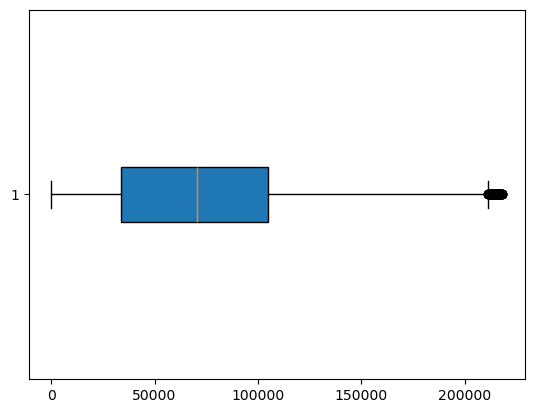

In [65]:
plt.boxplot(visa_df['prevailing_wage'],vert=False,patch_artist=True)
plt.show()

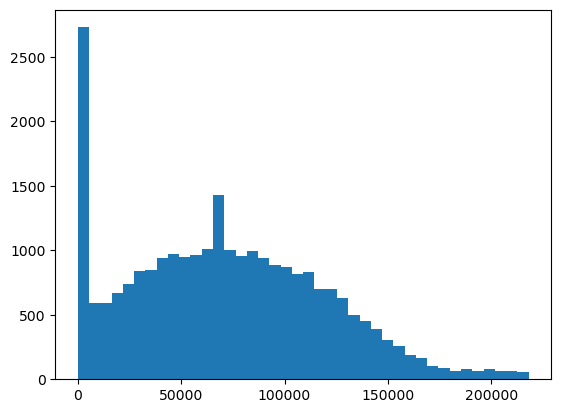

In [66]:
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.show()

In [ ]:
#THIS WITH DATAFRAME
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)
iqr=q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
cond1 = visa_df['prevailing_wage'] < lower_bound
cond2 = visa_df['prevailing_wage'] > upper_bound
outlier_df = visa_df[cond1|cond2]#ouliers datframe with respect to prevailing_wage
outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified
